In [1]:
#General imports 
import sys
import os
from datetime import datetime, timedelta, date
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
from retrieve_time import Retrieve_Timestamps
%matplotlib inline

In [2]:
#Initialize relevant variables
M = {}
time_format = '%Y-%m-%d %H:%M:%S.%f'

In [3]:
#Set matplotlib variables for prettier plots.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
fs = 36.

## Collect the data

In [10]:
#Read the sleep data.
fpath = './../data/floors_climbed.csv'
data = pd.read_csv(fpath, header=0, index_col=0, low_memory=False)
print(data.columns)
print(data['floor'])

Index(['end_time', 'pkg_name', 'time_offset', 'start_time', 'floor',
       'datauuid', 'update_time', 'create_time'],
      dtype='object')
0      2.0
1      1.0
2      2.0
3      1.0
4      1.0
      ... 
536    1.0
537    1.0
538    1.0
539    1.0
540    2.0
Name: floor, Length: 541, dtype: float64


In [32]:
#Create datetime objects and collect the bedtime hours.
starttime_obj = Retrieve_Timestamps(
  data['start_time'].values, data['time_offset'].values, 'UTC', 'datestr', time_format).out
endtime_obj = Retrieve_Timestamps(
  data['end_time'].values, data['time_offset'].values, 'UTC', 'datestr', time_format).out
data['Start_time_obj'] = starttime_obj

#Compute duration. This is, supposedly always 1min.
duration = endtime_obj - starttime_obj
data['duration'] = np.array([t.days*24.*60 + t.seconds/60. for t in duration]) #In minutes

ref_date = min(starttime_obj)
time_prog = starttime_obj - ref_date
data['time_prog'] = np.array([t.days + t.seconds/86400. for t in time_prog]) #In days

data['start_hour'] = np.array([t.hour + t.minute/60. + t.second/3600. for t in starttime_obj])
print(data['Start_time_obj'])


0      2018-01-24 17:29:51-04:00
1      2018-03-27 18:04:01-03:00
2      2018-02-12 03:38:21-04:00
3      2018-03-16 14:17:05-03:00
4      2018-01-22 11:50:22-04:00
                 ...            
536    2018-01-31 13:28:25-04:00
537    2018-03-17 11:18:10-03:00
538    2017-12-21 04:17:15-07:00
539    2018-04-04 14:24:02-03:00
540    2017-12-27 16:15:08-07:00
Name: Start_time_obj, Length: 541, dtype: object


## Time range

In [12]:
print('Start date: ', (min(starttime_obj)))
print('End date: ', (max(starttime_obj)))

Start date:  2017-12-16 04:46:12-04:00
End date:  2018-05-03 05:13:11-03:00


## Histogram start time, duration, counts, speed, distance

(array([ 0.,  1.,  6., 20., 70., 68., 31., 24., 19., 13.,  7., 23., 29.,
        55., 59., 32., 43., 33.,  7.,  0.,  0.,  1.,  0.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 24 Patch objects>)

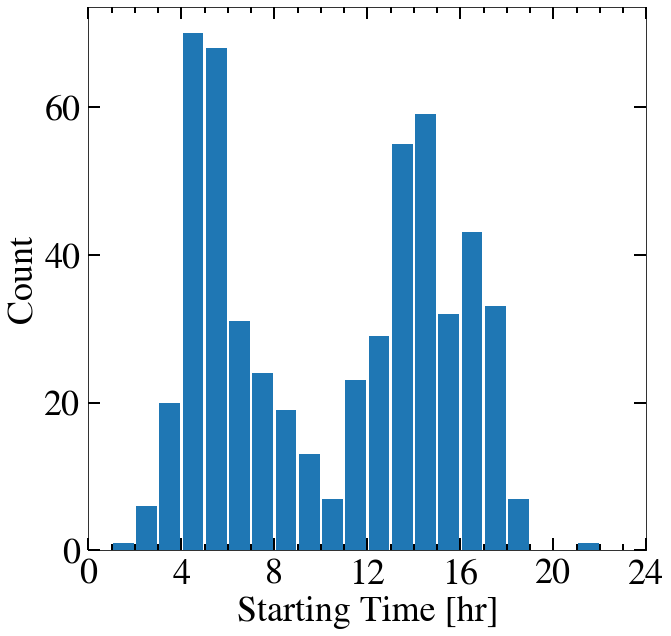

In [30]:
#First, make figure frame
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

xlabel = r'Starting Time [hr]'
ylabel = r'Count'
ax.set_xlabel(xlabel, fontsize=fs)
ax.set_ylabel(ylabel, fontsize=fs)
ax.set_xlim(0., 24.)
#ax.set_ylim(25., 175.)
ax.tick_params(axis='y', which='major', labelsize=fs, pad=8)      
ax.tick_params(axis='x', which='major', labelsize=fs, pad=8)
ax.tick_params('both', length=12, width=2., which='major',
                     direction='in', right=True, top=True)
ax.tick_params('both', length=6, width=2., which='minor',
                     direction='in', right=True, top=True) 
ax.xaxis.set_minor_locator(MultipleLocator(1.))
ax.xaxis.set_major_locator(MultipleLocator(4.))
#ax.yaxis.set_minor_locator(MultipleLocator(10.))
#ax.yaxis.set_major_locator(MultipleLocator(20.))

#Plot data.

ax.hist(data['start_hour'].values, bins=np.arange(0,24.1,1), rwidth=0.9)

## Corner plot with relevant variables.
This shows that quantities can be integrated over a day.

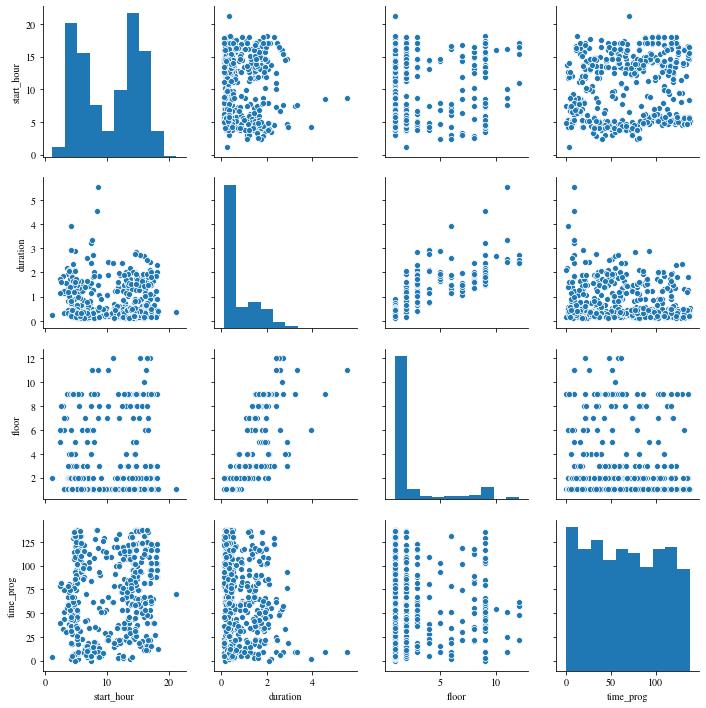

In [15]:
#Select relevant columns and make corner plot.
pair_cols = ['start_hour', 'duration', 'floor', 'time_prog']
g = sns.pairplot(data, vars=pair_cols)

## Combine data per day.

In [100]:
#Create new dictionary with the relevant columns to be resampled.
#pair_cols = ['Start_time_obj', 'floor', 'duration']
pair_cols = ['Start_time_obj']

#print(data['time_offset'])

data['t_raw'] = pd.to_datetime(data['start_time'], utc=True)
data['t'] = [x.tz_convert('UTC-0400') for x in data['t_raw']]

#data['a'] = data['Start_time_obj'].apply(lambda x : np.datetime64(x))
print(data['t_raw'])
#print(data['Start_time_obj'])

#M ={}
#M['a'] = data['Start_time_obj'].values
#M['a'] = np.datetime64(data['Start_time_obj'].values)
#M['v'] = data['floor'].values
#df = pd.DataFrame(M)

#print(data['Start_time_obj'])
#df3 = data[pair_cols].iloc[0:5]
#df3 = df3.set_index(['Start_time_obj'])
#print(df3['Start_time_obj'].values)
#df3['vals'] = np.zeros(5)
#df3 = df3.set_index(['Start_time_obj'])
#rint(df3)
#for v in df['a'].values:
#    print(np.datetime64(v))

#print(data_agg['Start_time_obj'])
#data_agg = data_agg.resample('D', on='Start_time_obj').agg({'floor':'sum'})
#df3 = df3.resample('D').agg({'vals':'sum',})

UnknownTimeZoneError: 'UTC-0400'

## Make corner plot of the combined data

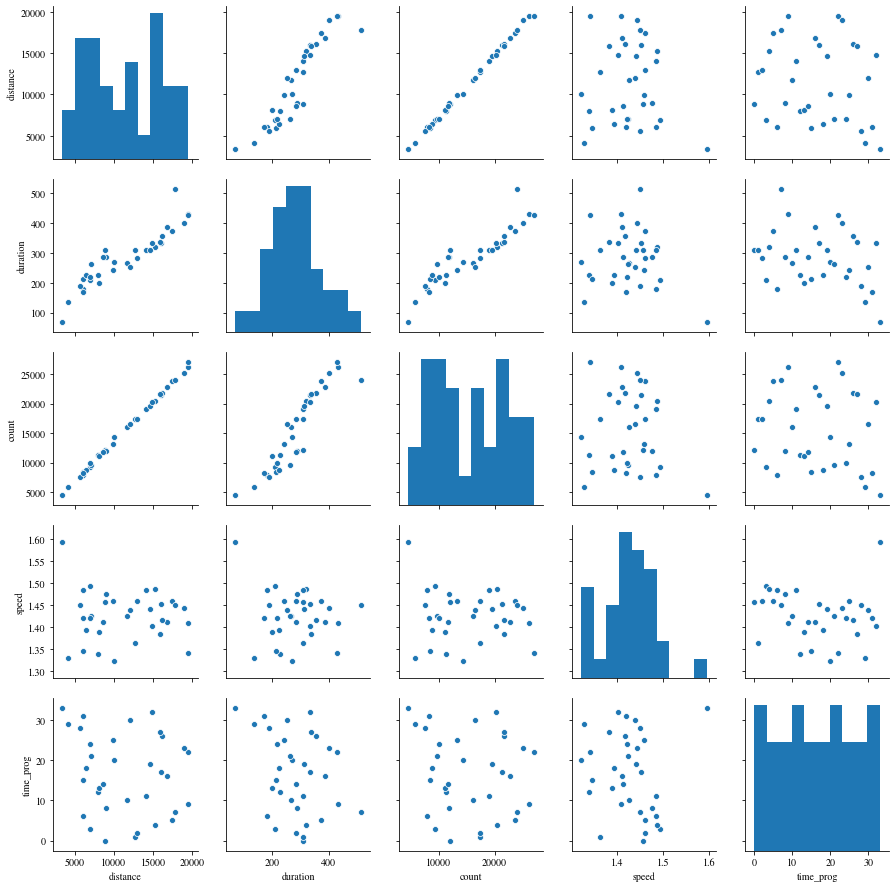

In [15]:
df3['time_prog'] = np.arange(df3.shape[0])
g = sns.pairplot(df3)